In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [ ]:
class quadraticState(TypedDict):
    a: int
    b: int
    c: int

    equation: str
    discriminant: float
    result: str


In [8]:
def show_equation(state: quadraticState) -> quadraticState:
    a = state['a']
    b = state['b']
    c = state['c']
    equation = f"{a}x^2 + {b}x + {c} = 0"
    return {"equation":equation}


def calculate_discriminant(state: quadraticState) -> quadraticState:
    a = state['a']
    b = state['b']
    c = state['c']
    discriminant = b**2 - 4*a*c
    return {"discriminant":discriminant, "result":discriminant}

def real_roots(state: quadraticState) -> quadraticState: # when d > 0
    a = state['a']
    b = state['b']
    c = state['c']
    d = state['discriminant']
    root1 = (-b + d**0.5) / (2*a)
    root2 = (-b - d**0.5) / (2*a)
    result = f"Real roots: {root1}, {root2}"
    return {"result": result}


def repeated_roots(state: quadraticState) -> quadraticState: # when d = 0
    a = state['a']
    b = state['b']
    c = state['c']
    d = state['discriminant']
    root = -b / (2*a)
    result = f"Only Repeated root is: {root}"
    return {"result": result}



def no_real_roots(state: quadraticState) -> quadraticState: # when d < 0
    
    result = f"No Real Roots"
    return {"result": result}


def check_condition(state: quadraticState) -> Literal['real_roots', 'repeated_roots', 'no_real_roots']:
    d = state['discriminant']
    if d > 0:
        return 'real_roots'
    elif d == 0:
        return 'repeated_roots'
    else:
        return 'no_real_roots'

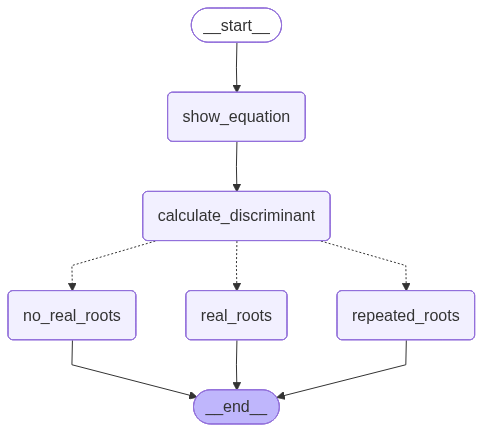

In [10]:
# define graph
graph = StateGraph(quadraticState)

# add nodes
graph.add_node( "show_equation",show_equation)
graph.add_node("calculate_discriminant", calculate_discriminant)


graph.add_node("real_roots",real_roots)
graph.add_node("no_real_roots",no_real_roots)
graph.add_node("repeated_roots",repeated_roots)


# add edges
graph.add_edge(START, "show_equation")
graph.add_edge("show_equation", "calculate_discriminant")
graph.add_conditional_edges("calculate_discriminant", check_condition)
graph.add_edge("real_roots", END)
graph.add_edge("no_real_roots", END)
graph.add_edge("repeated_roots", END)


# compile workflow

workflow = graph.compile()
workflow

In [12]:
initial_state: quadraticState ={
    'a': 4,
    'b': 2,
    'c': 4
}

workflow.invoke(initial_state)

{'a': 4,
 'b': 2,
 'c': 4,
 'equation': '4x^2 + 2x + 4 = 0',
 'discriminant': -60,
 'result': 'No Real Roots'}